<a href="https://colab.research.google.com/github/hrashidBI/TSF-GRIF-Hrashid/blob/main/Task02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction using Unsupervised Machine Learning**
*From the given dataset, predict the optimal number of clusters and present it visually using Python code*

Author- **Md. Humayun Rashid**

*Data Science & Business Analytics Intern*

*GRIP - The Sparks Foundation*

---
Copyright Md. Humayun Rashid, 2022


From the given 'iris' dataset, **K-means clustering** will be used to predict the optimal number of clusters and represent it visually.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

Importing Iris Dataset

In [4]:
iris= datasets.load_iris()
iris_ds= pd.DataFrame(iris.data, columns= iris.feature_names)
iris_ds.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_ds.shape

(150, 4)

In [7]:
iris_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
iris_ds.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [9]:
iris_ds.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Looking Correlation

In [10]:
corr_ds= iris_ds.corr()
corr_ds

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


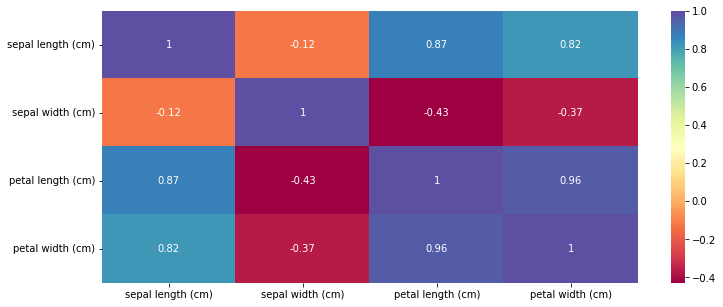

In [12]:
plt.figure(figsize= [12,5])
sns.heatmap(corr_ds, cmap='Spectral', annot=True)

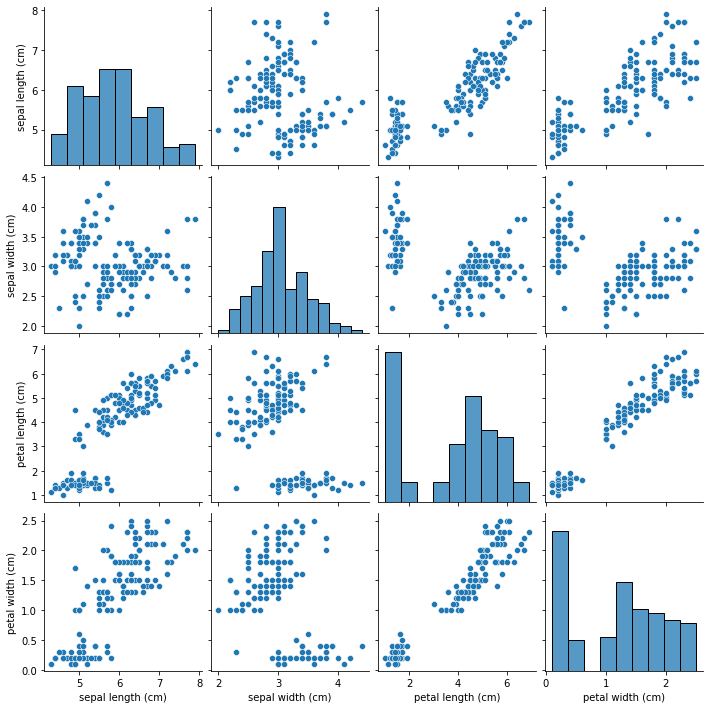

In [19]:
sns.pairplot(iris_ds)

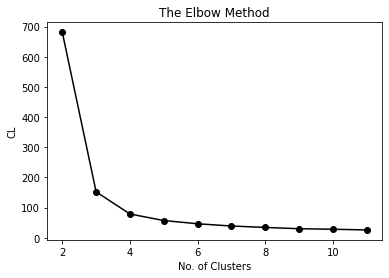

In [20]:
x= iris_ds.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
aa= []

for i in range(1,11):
    kmeans= KMeans(n_clusters= i, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 0)
    kmeans.fit(x)
    aa.append(kmeans.inertia_)
    

 
plt.plot(range(2,12), aa, color= 'k', marker= 'o')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('CL') # within cluster sum of squares
plt.show()

In [26]:
kmeans= KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300, n_init= 10, random_state= 0)
y_kmeans= kmeans.fit_predict(x)

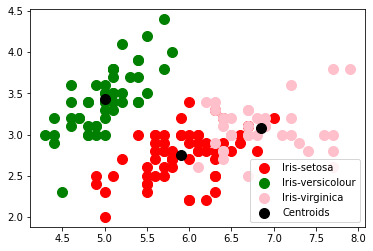

In [30]:


plt.scatter(x[y_kmeans== 0,0], x[y_kmeans== 0,1], s= 100, c='red', label= 'Iris-setosa')
plt.scatter(x[y_kmeans== 1,0], x[y_kmeans== 1,1], s= 100, c='green', label= 'Iris-versicolour')
plt.scatter(x[y_kmeans== 2,0], x[y_kmeans== 2,1], s= 100, c='pink', label= 'Iris-virginica')

# Plotting the centroids of the clusters.

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()

Summary- 
Finding and Visualizing the Optimal Number of More Clusters Using K Means in Unsupervised ML Tasks in Prediction
can be done